In [112]:
import pandas as pd
import numpy as np

### Import and read data

In [113]:
df = pd.read_csv("../data_files/UTSEUS-anjuke-real-estate-baoshan.csv")
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


### Get the data we care about

In [114]:
data_mod = df[['longitude','latitude','bedroom','room','surface','price','onesquaremeter']]
data_mod.head()

,longitude,latitude,bedroom,room,surface,price,onesquaremeter
0,121.343927,31.319356,2,2,30.0,1160000.0,38666.666667
1,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474
2,121.397487,31.290871,3,2,92.0,5350000.0,58152.173913
3,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235
4,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000


### Small plots to understand the da

In [115]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [116]:
sns.set()

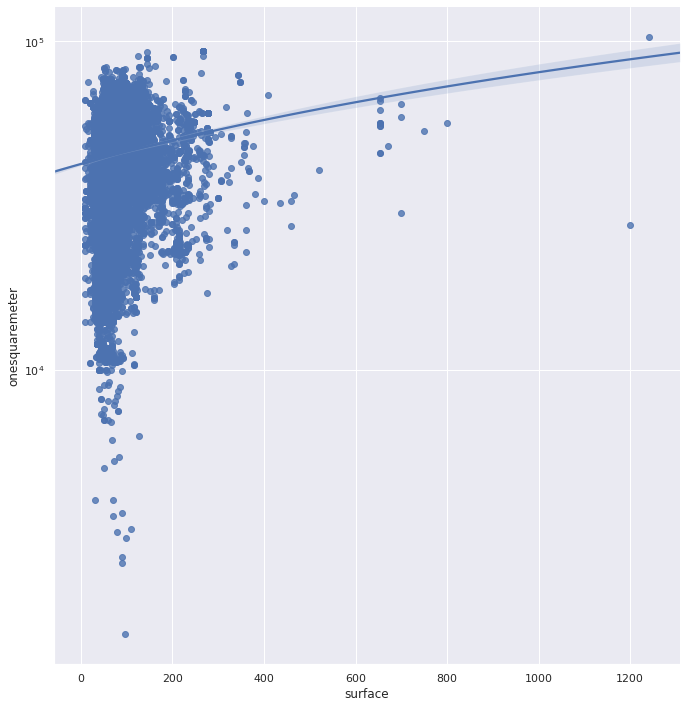

In [117]:
sns.lmplot(x='surface', y='onesquaremeter', data=data_mod, height=10)
plt.yscale('log')
#plt.xscale('log')

### Scale the data

In [ ]:
# Scale the data
# Purpose : put all the data on the same axis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_mod['lat_scale'] = scaler.fit_transform(data_mod[['latitude']])
data_mod['lon_scale'] = scaler.fit_transform(data_mod[['longitude']])
data_mod['bedr_scale'] = scaler.fit_transform(data_mod[['bedroom']])
data_mod['room_scale'] = scaler.fit_transform(data_mod[['room']])
data_mod['surf_scale'] = scaler.fit_transform(data_mod[['surface']])

### Add categorical data

In [119]:
# Add categorical data
price = data_mod['onesquaremeter']
y = pd.DataFrame.copy(price)

y[price <= np.quantile(price, 0.25)] = "Very Cheap"
y[(price > np.quantile(price, 0.25)) & (price <= np.quantile(price, 0.5))] = "Cheap"
y[(price > np.quantile(price, 0.5)) & (price <= np.quantile(price, 0.75))] = "Expensive"
y[price > np.quantile(price, 0.75)] = "Very Expensive"

### Separate the original data and the data used in the algorithm

In [120]:
# Separate df data and ML data
data = data_mod[['lat_scale','lon_scale','bedr_scale','room_scale','surf_scale']]

### Training and Testing sets creation

In [121]:
# Create the different sets of data (training/testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, shuffle=True)

### Model part
#### Create - Train - Predict

In [ ]:
# Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)

### Print results

In [125]:
# Show the results
# print(rfc.score(X_test, y_test))
# or 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
# or
# np.mean(y_test == y_predict)

0.7729782082324456
                precision    recall  f1-score   support

         Cheap       0.71      0.72      0.71      2562
     Expensive       0.70      0.69      0.69      2598
    Very Cheap       0.85      0.84      0.84      2526
Very Expensive       0.83      0.85      0.84      2639

      accuracy                           0.77     10325
     macro avg       0.77      0.77      0.77     10325
  weighted avg       0.77      0.77      0.77     10325

